1. **Origen del dataset, documentación, enlaces y referencias**

- - **Origen del dataset:** El conjunto de datos "German Credit dataset" proviene de la UCI Machine Learning Repository y fue creado por el Dr. Hans Hofmann.
- - **Documentación:** La documentación original del dataset se encuentra en [UCI - 1994](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) en el UCI Machine Learning Repository.
- - **Enlace al dataset:** Puedes acceder al dataset en [OpenML Dataset ID: 31](https://www.openml.org/d/31).

- 1.1. **Tamaño**

- - **El dataset** consta de un total de 1000 instancias o ejemplos.

2. **Características**

- - **Número de características:** El dataset contiene 21 atributos en total.
- - **Tipo de características:** Incluye atributos numéricos y nominales.
- - **Características distintivas:** Los atributos incluyen información sobre el historial crediticio, la duración del crédito, el propósito del crédito, el monto del crédito, el estado de la cuenta de ahorros, la edad, entre otros.

- 2.1. **Licencia**

- - **La descripción** del dataset en OpenML no menciona una licencia específica. Sin embargo, dado que proviene originalmente de la UCI Machine Learning Repository, puede considerarse de uso público y con derechos de autor de la UCI.

- 2.2. **Suficiencia de datos y número de características**

- - **El dataset** contiene 1000 instancias, lo que puede considerarse un tamaño moderado. Con 21 características, es posible realizar análisis y construir modelos de aprendizaje automático.

- 2.3. **Exploración de datos**

- - **Para explorar y analizar** este dataset, puedes utilizar bibliotecas como Numpy, Pandas, Matplotlib y Seaborn en tu entorno de Jupyter Notebook.


pip install pandas

3. **Carga de dataset:**
     - 2.1. **Utiliza la función auxiliar de Scikit-learn para cargar el dataset. El código necesario es el siguiente:**

In [94]:
from sklearn.datasets import fetch_openml
import pandas as pd

dataset = fetch_openml(data_id=31, as_frame=True)
data = dataset.frame


In [ ]:
4. **Proceso de Preparación de Datos:**
 - 4.1. **Limpieza de Datos:**
      - 4.1.1. **Verificar Valores Nulos:** Revisamos el dataset para identificar y manejar cualquier valor nulo o faltante.


In [95]:
# Verifica si hay valores nulos en el dataset
print(data.isnull().sum())


checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


- 4.1.2. **Manejar Valores Nulos:**
   - Dependiendo de la cantidad y naturaleza de los valores nulos, puedo decidir eliminarlos o imputarlos. En este caso aunque no los hay simulo que los elimino para evitar problemas en el modelo y mejorar la calidad de los datos evitando sesgos como si los hubiese. Esto puede impactar en la cantidad de datos pero dado que el dataset no los tiene no impactara.


In [96]:
# Elimina filas con valores nulos
data = data.dropna()

# Tambien podemos imputar valores nulos (con la media, mediana, moda, etc.)
# data = data.fillna(data.mean())  # Ejemplo con la media

- 4.2. **Formato de Datos:**
   - Revisamos el tipo de datos de cada variable y realizamos conversiones si es necesario. En este caso considero que estan bien categorizado aunque dejo ejemplo de conversión si se necesitara.

In [97]:
# Verifica tipos de datos
print(data.dtypes)

# Convertir tipos de datos si es necesario (ejemplo: convertir a categorías). En este caso no se realiza.
# data['column_name'] = data['column_name'].astype('category')

checking_status           category
duration                   float64
credit_history            category
purpose                   category
credit_amount              float64
savings_status            category
employment                category
installment_commitment     float64
personal_status           category
other_parties             category
residence_since            float64
property_magnitude        category
age                        float64
other_payment_plans       category
housing                   category
existing_credits           float64
job                       category
num_dependents             float64
own_telephone             category
foreign_worker            category
class                     category
dtype: object


- 4.3. **Identificación de Outliers:**
   - Usamos diagramas de caja (boxplots) para identificar outliers visualmente.


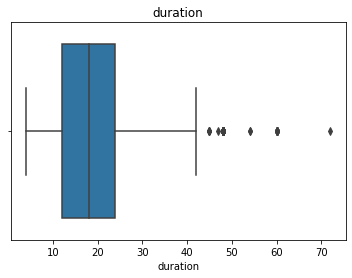

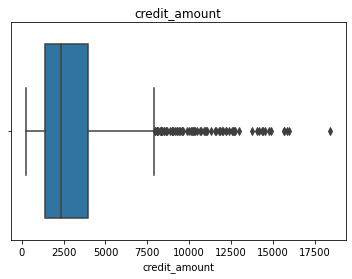

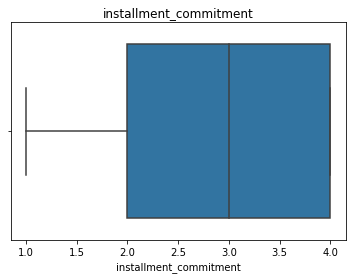

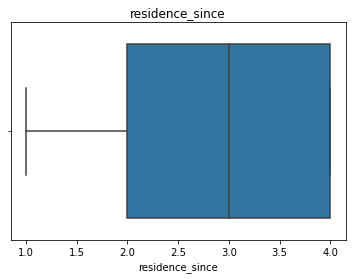

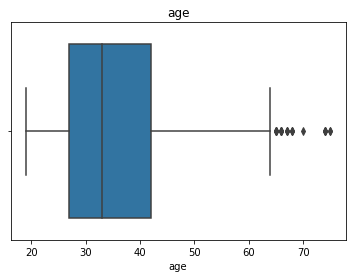

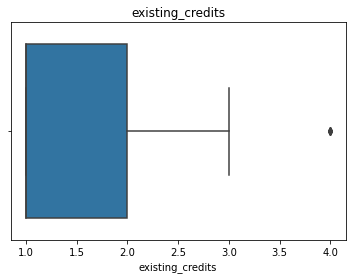

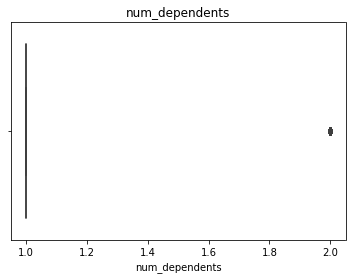

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de todas las variables numéricas
numerical_cols = data.select_dtypes(include=['float', 'int']).columns
for col in numerical_cols:
    sns.boxplot(x=data[col])
    plt.title(col)
    plt.show()


- 4.4. **Manejo de Outliers:**
   - Puedes decidir eliminarlos o transformarlos. En este caso primero calculamos los limites de los bigotes utilizando IQR para identificar los valores anomalos y eliminarlo. Y aunque el modelo tiene pocos ejemplos creo que es idoneo para afinar el modelo aun a riesgo de esto.


In [99]:
# Eliminación de outliers usando el rango intercuartil (IQR)
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]


- 4.5. **Construcción de Características:**
   - Planifica y crea nuevas características que puedan ser útiles para el modelo. El dataset en este caso se ha revisado y no considero necesario crear nuevas carateristicas. De todos modos dejo ejemplo de como crearla por si es necesario en el futuro.


In [8]:
# Ejemplo de creación de una nueva característica. En este caso consideramos que no es necesario. 
# data['new_feature'] = data['feature1'] * data['feature2']


- 4.6. **Visualización de Datos:**
   - Utilizo gráficos para entender la distribución y relación entre las variables.

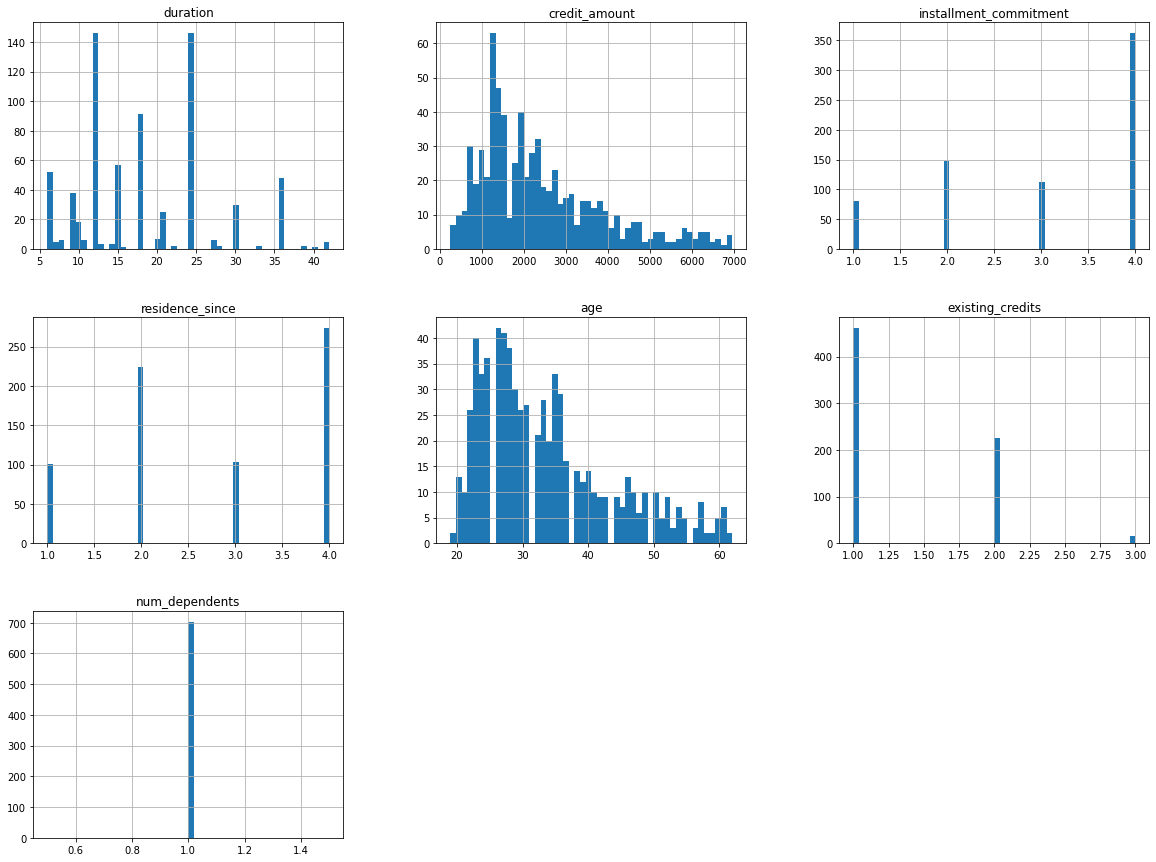

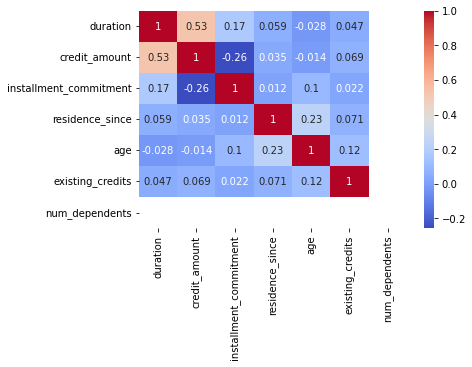

In [75]:
# Histogramas
data[numerical_cols].hist(bins=50, figsize=(20,15))
plt.show()

# Matriz de correlación
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


5. **Construir un Dataset Inicial:**
   - Con los datos listos para utilizar, construyo un dataset inicial. Para ello, guardo el dataset en un archivo CSV exportado y se comprueba si existe en dicho entorno.
      - Si ya existe el archivo, el código que limpia y prepara los datos no se ejecuta, sino que lo importa directamente.
      - Si no existe, el código limpia y prepara los datos y luego exporta el dataset a un archivo CSV.


In [100]:
import os
import pandas as pd
from sklearn.datasets import fetch_openml

# Defino del nombre del archivo CSV
csv_filename = 'dataset.csv'

# Verificamos de si el archivo CSV ya existe
if os.path.exists(csv_filename):
    # Si el archivo existe, lo importa directamente
    print(f"Loading data from {csv_filename}")
    dataset = pd.read_csv(csv_filename)
else:
    # Si el archivo no existe, carga el dataset desde OpenML
    print("Fetching data from OpenML...")
    openml_dataset = fetch_openml(data_id=31, as_frame=True)
    data = openml_dataset.frame
    
    # Realiza la limpieza y preparación de datos necesaria aquí
    # Eliminar filas con valores nulos
    cleaned_data = data.dropna()
    
    # Exporta el dataset limpio y preparado a un archivo CSV
    print(f"Saving cleaned data to {csv_filename}")
    cleaned_data.to_csv(csv_filename, index=False)
    dataset = cleaned_data

# Ahora, 'dataset' contiene los datos listos para usar
print(dataset.head())  # Imprime las primeras filas del dataset para verificar

Loading data from dataset.csv
  checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female 

6. **Plantear Hipótesis del Modelo:**
- Visualizamos el conjunto de características a utilizar (y cuáles no).
- Relaciones entre las características seleccionadas con distintas graficas.
- Planteamos 3 hipótesis para el modelo a entrenar. Consideramos los siguientes aspectos:
    - **Hipótesis 1:** Las características categóricas como `checking_status`, `credit_history`, `purpose`, etc., podrían tener un impacto significativo en la variable objetivo `class` ya que estas categorías podrían estar asociadas con el riesgo crediticio de un individuo.
    - **Hipótesis 2:** Las características numéricas como `duration`, `credit_amount`, `age`, etc., podrían influir en la capacidad de un individuo para pagar un crédito. Por ejemplo, los préstamos más grandes y los plazos más largos podrían estar asociados con un mayor riesgo.
    - **Hipótesis 3:** Podría haber una relación entre `employment` y `credit_amount` ya que los individuos empleados podrían tener acceso a mayores cantidades de crédito.
- Variable objetivo.
- Tipo de modelo a utilizar de entre las hipótesis.

        
        


- 6.1. **Conjunto de Características a Utilizar:**

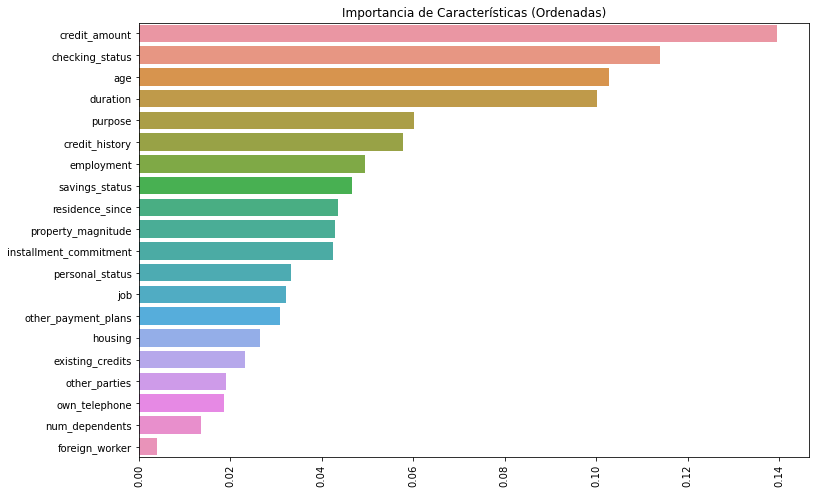

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Carga los datos
# Hay que asegurarse de tener el archivo CSV en la ruta correcta o proporciona la ruta completa al archivo
df = pd.read_csv('dataset.csv')

# Si los datos tienen características categóricas las convierte a tipo 'category'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

# Codificar características categóricas
le = LabelEncoder()
df_encoded = df.apply(lambda col: le.fit_transform(col) if col.dtype == 'category' else col)

# Separar características y variable objetivo
X = df_encoded.drop(columns=['class'])
y = df_encoded['class']

# Entrenar un clasificador de bosque aleatorio
clf = RandomForestClassifier()
clf.fit(X, y)

# Visualiza importancia de características en orden descendente
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [X.columns[i] for i in sorted_idx]

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance[sorted_idx], y=sorted_features)
plt.title('Importancia de Características (Ordenadas)')
plt.xticks(rotation=90)
plt.show()



- 6.2. **Relaciones Entre Características:**

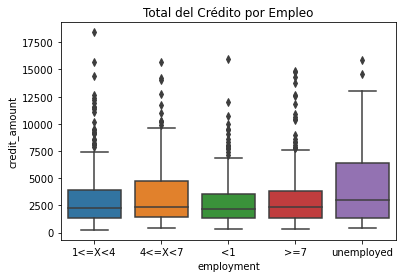

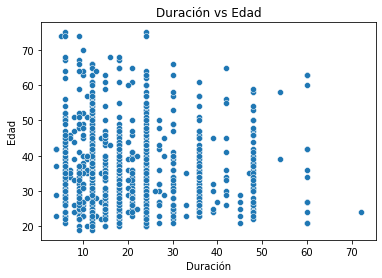

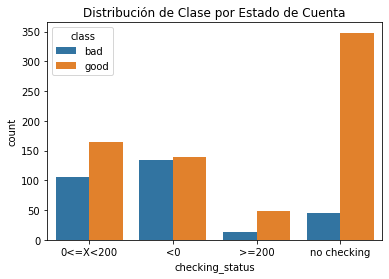

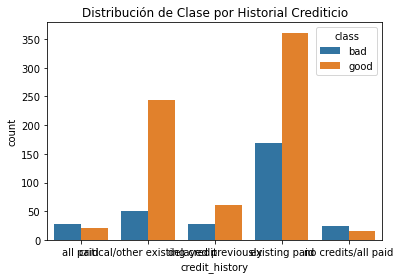

In [102]:
# Visualización de la relación entre 'employment' y 'credit_amount'
sns.boxplot(x='employment', y='credit_amount', data=df)
plt.title('Total del Crédito por Empleo')
plt.show()

# Visualización de la relación entre 'duration' y 'age'
sns.scatterplot(x='duration', y='age', data=df)
plt.title('Duración vs Edad')
plt.xlabel('Duración')
plt.ylabel('Edad')
plt.show()

# Visualización de la distribución de 'class' con respecto a 'checking_status'
sns.countplot(x='checking_status', hue='class', data=df)
plt.title('Distribución de Clase por Estado de Cuenta')
plt.show()

# Visualización de la distribución de 'class' con respecto a 'credit_history'
sns.countplot(x='credit_history', hue='class', data=df)
plt.title('Distribución de Clase por Historial Crediticio')
plt.show()

- 6.3. **Variable Objetivo:**
   - **Hipótesis 3:** La variable objetivo `class` podría estar fuertemente influenciada por características como `checking_status`, `credit_history`, y `credit_amount` ya que estas son indicativas de la situación financiera del solicitante.

- 6.4. **Tipo de Modelo:**
   - **Hipótesis 1:** Un modelo de clasificación como Regresión Logística podría ser un buen punto de partida ya que la variable objetivo es categórica.
   - **Hipótesis 2:** Modelos basados en árboles como Random Forest o Gradient Boosting podrían ser efectivos para capturar relaciones no lineales y interacciones entre características.
   - **Hipótesis 3:** Podrías necesitar codificar las características categóricas (por ejemplo, mediante codificación one-hot o codificación de etiquetas) para utilizarlas en modelos que no manejan variables categóricas directamente.


7. **Para cada una de las hipótesis, entrenamos un modelo simple y contrastamos la hipótesis evaluándolo.**
- - Para dicho entrenamiento, usamos un porcentaje de los ejemplos disponibles y sólo un dataset de entrenamiento y test (sin validación), ya que lo que buscamos es obtener una idea rápida sobre la idoneidad de las mismas.

- 7.1. **Preparar los Datos:**
   - Primero, divide tus datos en conjuntos de entrenamiento y prueba. También, si tienes características categóricas, asegúrate de codificarlas adecuadamente.

- 7.2. **Entrenar Modelos Simples:**
   - Para cada hipótesis, selecciona un conjunto de características y entrena un modelo simple. Puedes usar modelos lineales, árboles de decisión, o cualquier otro modelo que sea rápido de entrenar.

- 7.3. **Evaluar los Modelos:**
   - Evalúa cada modelo usando métricas de clasificación como precisión, recall, F1-score, etc. Esto te dará una idea rápida de qué tan bien está


In [103]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from itertools import product

# Definir características para cada hipótesis
features_h1 = ['checking_status', 'credit_history', 'purpose']
features_h2 = ['duration', 'credit_amount', 'age']
features_h3 = ['employment', 'credit_history', 'credit_amount']

# Definir modelos
models = {
    'Regresión Logística': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Crear una lista de todas las combinaciones posibles de hipótesis y modelos
combinations = list(product([features_h1, features_h2, features_h3], models.keys()))

# Crear un diccionario para almacenar los resultados
results = {}

def train_and_evaluate(features, X, y, hypothesis_name, model):
    X_h = X[features]
    
    # Dividir datos
    X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y, test_size=0.2, random_state=42)
    
    # Escalar los datos
    scaler_h = StandardScaler()
    X_train_scaled_h = scaler_h.fit_transform(X_train_h)
    X_test_scaled_h = scaler_h.transform(X_test_h)
    
    # Entrenar el modelo
    model.fit(X_train_scaled_h, y_train_h)
    
    # Hacer predicciones y evaluar
    y_pred_h = model.predict(X_test_scaled_h)
    print(f"Reporte de Clasificación para conjunto de características {features} con modelo {hypothesis_name}:")
    print(classification_report(y_test_h, y_pred_h))
    print("--------------------------------------------------------------")
    
    # Almacenar el F1-score en el diccionario de resultados
    f1 = f1_score(y_test_h, y_pred_h, average='weighted')
    results[f'{hypothesis_name} con {model}'] = f1

# Evaluar todas las combinaciones posibles de hipótesis y modelos
for combination in combinations:
    features, model_name = combination
    model = models[model_name]
    train_and_evaluate(features, X, y, f'Hipótesis {combinations.index(combination) + 1}', model)

# Encontrar la mejor combinación basada en el F1-score ponderado
best_combination = max(results, key=results.get)
best_f1 = results[best_combination]

# Imprimir la mejor combinación y su F1-score
print(f"La mejor combinación es {best_combination} con un F1-score ponderado de {best_f1:.2f}")

# Función para concluir basado en los F1-scores
def conclude(results):
    best_hypothesis, best_model = best_combination.split(' con ')
    best_f1 = results[best_combination]
    print(f"La mejor combinación es {best_hypothesis} con {best_model} y un F1-score ponderado de {best_f1:.2f}")
    print("Conclusiones:")
    for combination, f1 in results.items():
        hypothesis, model = combination.split(' con ')
        print(f"- {hypothesis}: El F1-score ponderado obtenido fue {f1:.2f} con el modelo {model}.")
    print(f"Se recomienda proceder con las características seleccionadas en {best_hypothesis} y el modelo {best_model} para futuros modelos y análisis.")

# Llamar a la función de conclusión
conclude(results)


Reporte de Clasificación para conjunto de características ['checking_status', 'credit_history', 'purpose'] con modelo Hipótesis 1:
              precision    recall  f1-score   support

           0       0.43      0.20      0.28        59
           1       0.73      0.89      0.80       141

    accuracy                           0.69       200
   macro avg       0.58      0.54      0.54       200
weighted avg       0.64      0.69      0.64       200

--------------------------------------------------------------
Reporte de Clasificación para conjunto de características ['checking_status', 'credit_history', 'purpose'] con modelo Hipótesis 2:
              precision    recall  f1-score   support

           0       0.49      0.36      0.41        59
           1       0.76      0.84      0.80       141

    accuracy                           0.70       200
   macro avg       0.62      0.60      0.61       200
weighted avg       0.68      0.70      0.68       200

---------------------

8. **Entrenamiento en Profundidad del Modelo Seleccionado:**
   - Tras evaluar las hipótesis, selecciona un tipo de modelo y comienza a entrenarlo en profundidad, siguiendo las explicaciones vistas en el curso:
- 8.1. **Escoger un Conjunto de Características:**
       - Basado en la Hipótesis 2: `selected_features = ['duration', 'credit_amount', 'age']`.
- 8.2 **Preprocesar los datos, crear procesos y subsets de validación, y preparar el conjunto de test final.:**

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

selected_features = ['duration', 'credit_amount', 'age']

# Dividir datos en entrenamiento y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Dividir datos de entrenamiento en entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

- 8.3. **Comprobación de Hiperparámetros:**

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define el modelo (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)

# Define los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configura la búsqueda en grilla
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted')

# Ajusta el modelo
grid_search.fit(X_train_scaled, y_train)

# Obtiene los mejores hiperparámetros
best_params = grid_search.best_params_

- 8.4. **Entrenamiento y Evaluación del Modelo:**

In [106]:
# Entrenar el modelo con los mejores hiperparámetros
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_valid = final_model.predict(X_valid_scaled)
y_pred_test = final_model.predict(X_test_scaled)

# Evaluar el modelo
print("Reporte de Clasificación para el conjunto de validación:")
print(classification_report(y_valid, y_pred_valid))
print("Reporte de Clasificación para el conjunto de prueba:")
print(classification_report(y_test, y_pred_test))

Reporte de Clasificación para el conjunto de validación:
              precision    recall  f1-score   support

           0       0.33      0.19      0.24        62
           1       0.70      0.83      0.75       138

    accuracy                           0.63       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.58      0.63      0.60       200

Reporte de Clasificación para el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.44      0.29      0.35        59
           1       0.74      0.84      0.79       141

    accuracy                           0.68       200
   macro avg       0.59      0.57      0.57       200
weighted avg       0.65      0.68      0.66       200



- 8.5. **Análisis:**
- - 8.5.1. **Precision:**
   - Para la clase 0 (malos créditos), la precisión es relativamente baja, lo que significa que el modelo tiene un número significativo de falsos positivos para la clase 0.
   - Para la clase 1 (buenos créditos), la precisión es más alta, indicando que el modelo es más confiable al predecir buenos créditos.

- - 8.5.2. **Recall:**
   - El recall para la clase 0 es bajo, lo que significa que el modelo no está identificando correctamente muchos de los malos créditos reales.
   - El recall para la clase 1 es alto, lo que indica que el modelo identifica correctamente la mayoría de los buenos créditos.

- - 8.5.3. **F1-Score:**
   - El F1-score para la clase 0 es bajo, lo cual es una consecuencia de la baja precisión y recall para esta clase.
   - El F1-score para la clase 1 es bastante más alto, reflejando un buen balance entre precisión y recall para los buenos créditos.

- 8.6. **Conclusión:**
   - El modelo actual ha demostrado un rendimiento moderado, destacando una necesidad crítica de mejora en la identificación de malos créditos. Se sugiere encarecidamente explorar las estrategias mencionadas para elevar la efectividad del modelo antes de considerar su implementación en un entorno de producción.

9. **Iteración y Experimentación Continua:**
   - En el proceso de entrenamiento final vamos a iterar de nuevo. Planteamos múltiples posibilidades o hipótesis, comprobamos y anotamos sus resultados.
- 9.1. **Selección de Hipótesis y Características:**
   - Seleccionamos hipótesis y conjuntos de características que deseo probar. Definimos las características de cada hipótesis y las guardarmos en una lista:


In [107]:
# Hipótesis y características
hipotesis = [
    {'name': 'Hipótesis 1', 'features': ['checking_status', 'credit_history', 'purpose']},
    {'name': 'Hipótesis 2', 'features': ['duration', 'credit_amount', 'age']},
    {'name': 'Hipótesis 3', 'features': ['checking_status', 'credit_history', 'credit_amount']}
]

- 9.2. **Ciclo de Iteración:**
   - Iteramos a través de las hipótesis y características, entrenando y evaluando el modelo. Usamos, como se recomienda, un bucle for:
   

In [108]:
# Ciclo de Iteración
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

results = []

for hipotesis_config in hipotesis:
    features = hipotesis_config['features']

    # Preparar el conjunto de datos con las características seleccionadas

    # Dividir datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2, random_state=42)

    # Entrenar un modelo (por ejemplo, Regresión Logística)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Evaluar el modelo
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Guardar resultados
    result = {
        'hipotesis': hipotesis_config['name'],
        'features': features,
        'report': report
    }
    results.append(result)

- 9.3. **Análisis de Resultados:**
   - Completamos el ciclo de iteraciones. Analizamos los resultados y comparamos el rendimiento.Usamos la hipótesis con el F1-score como se recomienda:
  

In [109]:
# Análisis de Resultados
best_hypothesis = None
best_f1_score = 0

for result in results:
    weighted_f1 = result['report']['weighted avg']['f1-score']
    if weighted_f1 > best_f1_score:
        best_f1_score = weighted_f1
        best_hypothesis = result

# Impresión de Resultados
print("Reporte de la mejor hipótesis:")
print(best_hypothesis['report'])

print("\nLa mejor hipótesis basada en el F1-score ponderado es:", best_hypothesis['hipotesis'])
print("F1-score ponderado:", best_f1_score)

Reporte de la mejor hipótesis:
{'0': {'precision': 0.7777777777777778, 'recall': 0.11864406779661017, 'f1-score': 0.2058823529411765, 'support': 59}, '1': {'precision': 0.7277486910994765, 'recall': 0.9858156028368794, 'f1-score': 0.8373493975903614, 'support': 141}, 'accuracy': 0.73, 'macro avg': {'precision': 0.7527632344386271, 'recall': 0.5522298353167447, 'f1-score': 0.5216158752657689, 'support': 200}, 'weighted avg': {'precision': 0.7425072716695753, 'recall': 0.73, 'f1-score': 0.6510666194188519, 'support': 200}}

La mejor hipótesis basada en el F1-score ponderado es: Hipótesis 2
F1-score ponderado: 0.6510666194188519


- 9.4. **Conclusión:**
   - De los resultados proporcionados, podemos sacar las siguientes conclusiones:

   1. La mejor hipótesis basada en el F1-score ponderado es la "Hipótesis 2" con un F1-score ponderado de aproximadamente 0.6511.

   2. Al observar el reporte de la mejor hipótesis, podemos notar lo siguiente:

      - Para la clase "0" (posiblemente "mal crédito"), el modelo tiene una precisión baja del 0.7778, lo que significa que de las predicciones que hizo para esta clase, solo el 77.78% eran correctas. Sin embargo, el recall (sensibilidad) es aún más bajo, lo que indica que el modelo no pudo identificar correctamente la mayoría de las instancias de esta clase.

      - Para la clase "1" (posiblemente "buen crédito"), el modelo tiene una precisión del 0.7277, lo que significa que el 72.77% de las predicciones para esta clase son correctas. Además, el recall es alto, lo que sugiere que el modelo puede identificar correctamente la mayoría de las instancias de esta clase.

   3. Aunque la precisión del modelo para la clase "0" es baja, el F1-score ponderado tiene en cuenta tanto la precisión como el recall, lo que indica que la "Hipótesis 2" es la mejor opción en términos de equilibrio entre precisión y recall.

   En resumen, la "Hipótesis 2" con las características 'duration', 'credit_amount' y 'age' parece ser la mejor elección para desarrollar un modelo basado en los resultados proporcionados. Sin embargo, aún se pueden realizar ajustes adicionales y explorar otras características o modelos para mejorar el rendimiento del modelo.


10. **Evaluación Detallada en Cada Iteración:**
   - En cada iteración, evaluamos el modelo con detenimiento y realizamos un análisis de varios aspectos, que incluyen:
      - **Conjunto de Métricas de Evaluación:** Calculamos métricas de evaluación como precisión, recall, F1-score, AUC-ROC, entre otras, para comprender el rendimiento general del modelo.
      - **Representación de Errores o Residuos:** Analizamos la representación de errores o residuos para entender dónde y cómo el modelo comete errores y si hay patrones en los mismos.
      - **Validación:** Utilizamos conjuntos de validación para asegurarnos de que el modelo no está sobreajustando los datos de entrenamiento y generaliza bien a datos no vistos.
      - **Hiperparámetros:** Ajustamos y optimizamos los hiperparámetros del modelo para encontrar la mejor configuración.
      - **Desviación vs Sobreajuste:** Observamos la desviación (bias) y el sobreajuste (variance) del modelo para garantizar un equilibrio adecuado. Buscamos reducir el sesgo sin aumentar en exceso la varianza.


10.1. **Conjunto de Métricas de Evaluación:**
   - En cada iteración, calculamos métricas de evaluación como precisión, recall, F1-score, etc. Almacenamos estos resultados en una estructura de datos para su posterior análisis y comparación.
   

In [118]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Reemplazamos y_true y y_pred con valores reales y predichos
y_true = [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1, 1, 1]

# Calcula métricas de evaluación
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Almacenar métricas en un diccionario
evaluation_metrics = {
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

# Imprimir métricas
print("Métricas de Evaluación:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value}")

# Almacenar métricas en un diccionario
evaluation_metrics = {
    'Precision': precision_score(y_true, y_pred),
    'Recall': recall_score(y_true, y_pred),
    'F1-Score': f1_score(y_true, y_pred),
}

Métricas de Evaluación:
Precision: 0.6666666666666666
Recall: 0.8
F1-Score: 0.7272727272727272


10.2. **Representación de Errores o Residuos:**
   - Puedes analizar los errores cometidos por el modelo para comprender mejor sus debilidades. Esto podría incluir visualizar las predicciones incorrectas o graficar los residuos. Por ejemplo:
 

In [119]:
# Importar la biblioteca necesaria
import pandas as pd

# Crear un DataFrame con las predicciones y las etiquetas reales
df_predicciones = pd.DataFrame({'Predicciones': y_pred, 'Etiquetas Reales': y_true})

# Filtrar las filas donde las predicciones son incorrectas
incorrect_predictions = df_predicciones[df_predicciones['Predicciones'] != df_predicciones['Etiquetas Reales']]

# Mostrar las filas correspondientes a predicciones incorrectas
print(incorrect_predictions)

   Predicciones  Etiquetas Reales
2             0                 1
5             1                 0
8             1                 0


10.3. **Validación:**
   - Si aún no lo has hecho, considera realizar la validación cruzada en lugar de depender únicamente de un conjunto de validación. Esto te proporcionará una estimación más robusta del rendimiento del modelo y reducirá el riesgo de sobreajuste.
   - Puedes utilizar técnicas de validación cruzada como k-fold cross-validation o leave-one-out cross-validation para evaluar el modelo en diferentes divisiones de los datos.
   - Al utilizar validación cruzada, obtendrás una mejor estimación de cómo el modelo generaliza a datos no vistos y podrás identificar de manera más efectiva el sesgo y la varianza del modelo.


In [120]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Realizar validación cruzada
cross_val_scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5, scoring='accuracy')
print("Puntuaciones de Validación Cruzada:", cross_val_scores)
print("Precisión media:", np.mean(cross_val_scores))

Puntuaciones de Validación Cruzada: [0.715 0.735 0.72  0.72  0.68 ]
Precisión media: 0.714


10.4. **Hiperparámetros:**
   - Ajustar los hiperparámetros es una parte crucial de mejorar el rendimiento del modelo. Puedes usar técnicas de búsqueda de hiperparámetros como GridSearchCV o RandomizedSearchCV para encontrar la combinación óptima de hiperparámetros.
   - GridSearchCV te permite especificar una cuadrícula de valores para varios hiperparámetros y realiza una búsqueda exhaustiva para encontrar la mejor combinación.
   - RandomizedSearchCV es similar a GridSearchCV, pero realiza la búsqueda de forma aleatoria, lo que puede ser útil cuando el espacio de búsqueda de hiperparámetros es grande.
   - Al ajustar los hiperparámetros, ten en cuenta las métricas de evaluación, como precisión, recall, F1-score, etc., para determinar qué combinación de hiperparámetros produce el mejor rendimiento en tus datos.


In [123]:
# Ajustar los hiperparámetros
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

Mejores hiperparámetros encontrados: {'C': 0.1, 'penalty': 'l2'}


10.5. **Desviación vs. Sobreajuste:**
   - Es importante monitorear el equilibrio entre el desempeño en el conjunto de entrenamiento y el conjunto de prueba. Si el modelo tiene un rendimiento significativamente mejor en el conjunto de entrenamiento en comparación con el conjunto de prueba, podría estar sobreajustando.
   - Puedes graficar las curvas de aprendizaje para evaluar esto. Las curvas de aprendizaje muestran cómo evoluciona el rendimiento del modelo a medida que aumenta el tamaño del conjunto de entrenamiento. Si las curvas de entrenamiento y prueba convergen a un rendimiento similar a medida que se aumenta el tamaño del conjunto de entrenamiento, es una señal de que el modelo generaliza bien. Si las curvas divergen y el rendimiento en el conjunto de entrenamiento es mucho mejor que en el conjunto de prueba, podría ser un indicio de sobreajuste.
   - Además, puedes utilizar técnicas como la regularización para evitar el sobreajuste, ajustando la complejidad del modelo.


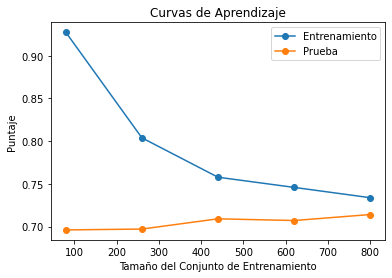

In [127]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

# Verificar desviación y sobreajuste mediante curvas de aprendizaje
model = LogisticRegression(max_iter=10000, penalty='l2')  # Aplicar regularización L2 y aumentar max_iter para evitar errores
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
plt.figure()
plt.title('Curvas de Aprendizaje')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Puntaje')
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Entrenamiento')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Prueba')
plt.legend(loc='best')
plt.show()

**10.6 Conclusión:**

**Conjunto de Entrenamiento (Entrenamiento):** La curva de entrenamiento comienza con un puntaje de 1 en el eje y porque el modelo está sobreajustando los datos de entrenamiento iniciales muy bien. A medida que aumenta el tamaño del conjunto de entrenamiento en el eje x, la puntuación disminuye gradualmente hasta converger alrededor de 0.73 al llegar a 1000 en el eje x. Esto significa que a medida que tienes más datos de entrenamiento, el modelo no puede ajustarse tan bien a cada punto de datos individual, lo que resulta en una puntuación de entrenamiento ligeramente más baja. La convergencia de la curva de entrenamiento hacia la curva de prueba es un signo positivo, ya que sugiere que el modelo no está sobreajustando tanto y generaliza mejor a medida que tiene más datos de entrenamiento.

**Conjunto de Prueba (Prueba):** La curva de prueba comienza con un puntaje de alrededor de 0.7 y se mantiene relativamente constante a medida que aumenta el tamaño del conjunto de entrenamiento en el eje x, llegando a alrededor de 0.72 al llegar a 800 en el eje x. Esto indica que el modelo generaliza razonablemente bien desde el principio y no mejora significativamente a medida que se agregan más datos de entrenamiento. En este punto, el modelo está cerca de su capacidad máxima de generalización.

En general, estas curvas de aprendizaje sugieren que el modelo está funcionando bastante bien. Las puntuaciones tanto en el conjunto de entrenamiento como en el de prueba son razonablemente altas y están convergiendo, lo que indica que el modelo no está sobreajustando de manera significativa y está generalizando de manera efectiva a partir de los datos disponibles.

Este comportamiento es positivo porque significa que, si tienes más datos disponibles en el futuro, es posible que el modelo continúe mejorando su capacidad de generalización. También, es importante destacar que el modelo no está sobreajustando drásticamente los datos de entrenamiento actuales, lo que lo hace más confiable para hacer predicciones en datos no vistos.
